<a href="https://colab.research.google.com/github/vanlee913/bigdata/blob/main/0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

library(SportsAnalytics)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -69.798               0.504  


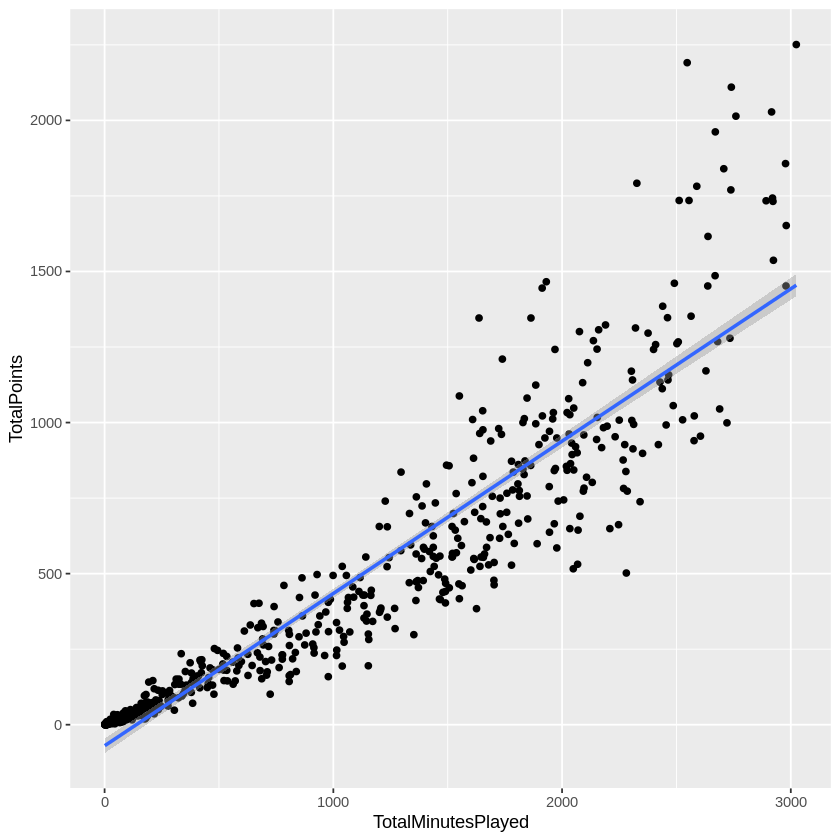

In [36]:
NBA1718<- fetch_NBAPlayerStatistics("17-18")

ggplot(NBA1718,aes(x=TotalMinutesPlayed,y=TotalPoints))+ geom_point()+ geom_smooth(method = "glm")


lm(TotalPoints~TotalMinutesPlayed,data =NBA1718)

In [37]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted, data =NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          -12.08194             -0.00901              1.29193  

Degrees of Freedom: 539 Total (i.e. Null);  537 Residual
Null Deviance:	    1.2e+08 
Residual Deviance: 2180000 	AIC: 6020

In [38]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position, data =NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
            29.0253              -0.0168               1.3118  
         PositionPF           PositionPG           PositionSF  
           -29.8158             -57.5665             -39.1272  
         PositionSG  
           -58.5594  

Degrees of Freedom: 538 Total (i.e. Null);  532 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    1.2e+08 
Residual Deviance: 2e+06 	AIC: 5970

In [39]:
mydata <- read.csv(
  "https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv"
  )

In [40]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,
          data = mydata, family = "binomial")
sum <- summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.9900,1.1400,-3.5,0.00047
gre,0.0023,0.0011,2.1,0.03847
gpa,0.8040,0.3318,2.4,0.01539
rank2,-0.6754,0.3165,-2.1,0.03283
rank3,-1.3402,0.3453,-3.9,0.00010
rank4,-1.5515,0.4178,-3.7,0.00020


In [41]:
install.packages("rpart")

library(rpart)

DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1718)

DT

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n=539 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 539 400 SG (0.14 0.21 0.2 0.19 0.26)  
    2) Blocks>=36 108  68 C (0.37 0.29 0.037 0.23 0.074)  
      4) ThreesMade< 6 35   8 C (0.77 0.17 0 0.057 0) *
      5) ThreesMade>=6 73  48 PF (0.18 0.34 0.055 0.32 0.11)  
       10) Assists< 1.6e+02 40  19 PF (0.12 0.53 0 0.33 0.025)  
         20) Steals< 64 33  13 PF (0.15 0.61 0 0.21 0.03) *
         21) Steals>=64 7   1 SF (0 0.14 0 0.86 0) *
       11) Assists>=1.6e+02 33  23 SF (0.24 0.12 0.12 0.3 0.21)  
         22) Blocks>=60 15   7 C (0.53 0.13 0.067 0.2 0.067) *
         23) Blocks< 60 18  11 SF (0 0.11 0.17 0.39 0.33) *
    3) Blocks< 36 431 300 SG (0.086 0.19 0.24 0.18 0.31)  
      6) Assists< 1.5e+02 337 240 SG (0.11 0.23 0.16 0.21 0.29)  
       12) ThreesMade< 2.5 113  79 PF (0.27 0.3 0.13 0.13 0.17)  
         24) Blocks>=1.5 49  24 C (0.51 0.35 0.041 0.041 0.061) *
         25) Blocks< 1.5 64  47

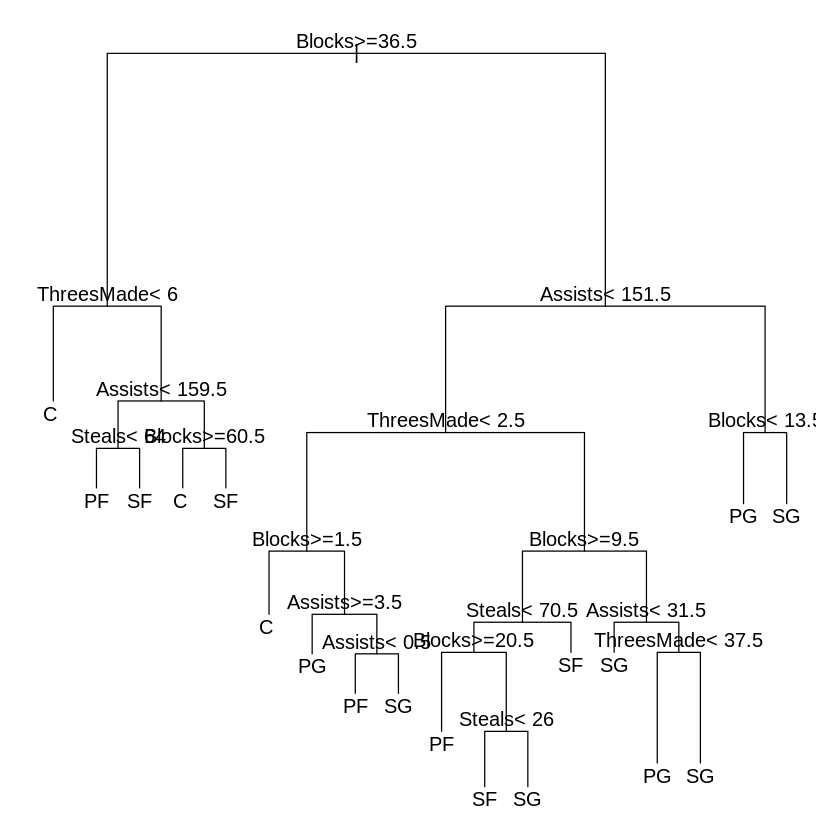

In [42]:
par(mfrow = c(1,1),mar = rep(1,4)) #下左上右
plot(DT)
text(DT, use.n = F,all = F, cex=1)

In [43]:
install.packages("rpart.plot")

library(rpart.plot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



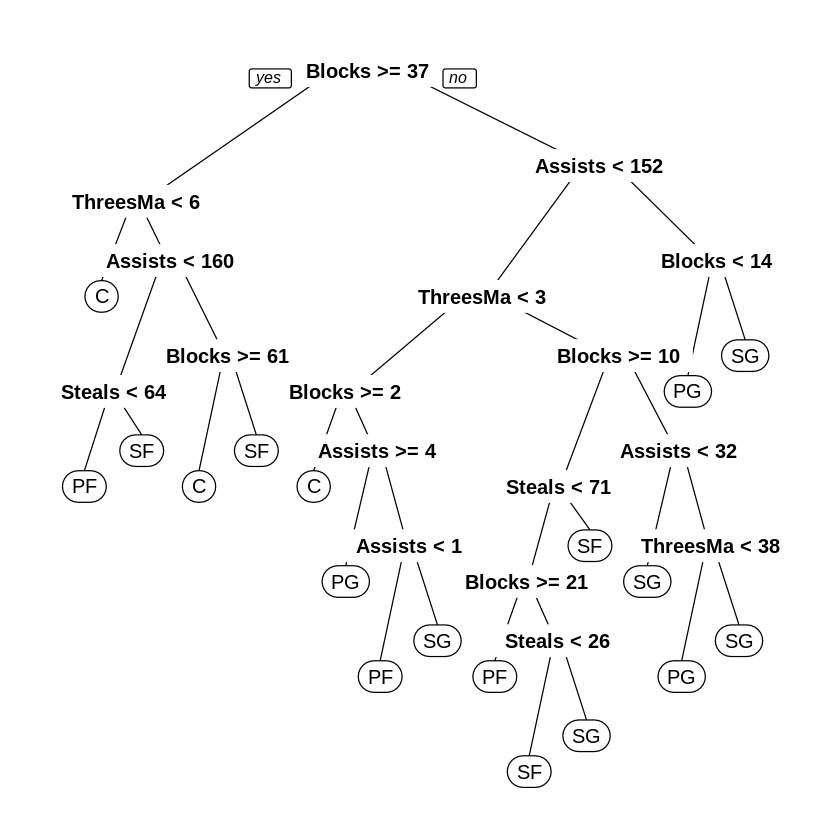

In [44]:
prp(DT)

In [45]:
install.packages("arules")
library(arules) #arules演算法

install.packages("datasets")
library(datasets)

data(Groceries)
Groceries@data@Dim #169種商品，9835筆交易資料

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


[1]  169 9835

In [46]:
rules <- apriori(Groceries, #data=Groceries
          parameter = list(supp=0.001,conf=0.8), #參數最低限度
          control=list(verbose=F)) #不要顯示output

options(digits = 2) #only two digits
inspect(rules[1:5]) #show the top five rules

#Support: 一次交易中,包括規則內的物品的機率(買啤酒同時買尿布的機率)
#Confidence: 包含左邊物品A的交易也會包含右邊物品B的條件機率(在買了啤酒的顧客中,有買尿布的比例)
#Lift: 規則的信心比期望值高多少。(買了啤酒以後,有買尿布的機率)/(在所有顧客群中買尿布的機率)

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [47]:
rules<-sort(rules,by="confidence",decreasing = TRUE) #按照confidence排序
inspect(rules[1:5]) #show the top five rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [49]:
#買了什麼東⻄的人,會買牛奶?
rulesR<-apriori(data = Groceries, parameter = list(supp=0.001,conf=0.08),
        appearance = list(default="lhs",rhs="whole milk"),#設定右邊一定要是牛奶
        control = list(verbose=F))#不要顯示output

rulesR<-sort(rulesR,decreasing = TRUE,by="confidence")#按照confidence排序
inspect(rulesR[1:5])#show the top five rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [53]:
#買了什麼東⻄的人,會買啤酒?
rulesR<-apriori(data = Groceries, parameter = list(supp=0.001,conf=0.08),
        appearance = list(default="lhs",rhs="bottled beer"),#設定右邊一定要是啤酒
        control = list(verbose=F))#不要顯示output

rulesR<-sort(rulesR,decreasing = TRUE,by="confidence")#按照confidence排序
inspect(rulesR[1:5])#show the top five rules

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {soda,liquor}           => {bottled beer} 0.0012  0.57       0.0021    7.1
[3] {liquor}                => {bottled beer} 0.0047  0.42       0.0111    5.2
[4] {herbs,bottled water}   => {bottled beer} 0.0012  0.40       0.0031    5.0
[5] {whole milk,soups}      => {bottled beer} 0.0011  0.38       0.0029    4.7
    count
[1] 19   
[2] 12   
[3] 46   
[4] 12   
[5] 11   


In [60]:
#買了什麼東⻄的人,會買米?
rulesR<-apriori(data = Groceries, parameter = list(supp=0.001,conf=0.08),
        appearance = list(default="lhs",rhs="rice"),#設定右邊一定要是米
        control = list(verbose=F))#不要顯示output

rulesR<-sort(rulesR,decreasing = TRUE,by="confidence")#按照confidence排序
inspect(rulesR[1:5])#show the top five rules

    lhs                        rhs    support confidence coverage lift count
[1] {root vegetables,                                                       
     other vegetables,                                                      
     whole milk,                                                            
     yogurt}                => {rice}  0.0013      0.169   0.0078   22    13
[2] {root vegetables,                                                       
     whole milk,                                                            
     butter}                => {rice}  0.0010      0.123   0.0082   16    10
[3] {root vegetables,                                                       
     other vegetables,                                                      
     yogurt}                => {rice}  0.0014      0.110   0.0129   14    14
[4] {root vegetables,                                                       
     whole milk,                                                            

In [56]:
#買了牛奶的人,會買什麼東⻄?
rulesR<-apriori(data = Groceries, parameter = list(supp=0.001,conf=0.08,minlen=2),
        appearance = list(default="rhs",lhs="whole milk"),#設定左邊一定要是牛奶
        control = list(verbose=F))#不要顯示output

rulesR<-sort(rulesR,decreasing = TRUE,by="confidence")#按照confidence排序
inspect(rulesR[1:5])#show the top five rules

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [55]:
#買了啤酒的人,會買什麼東⻄?
rulesR<-apriori(data = Groceries, parameter = list(supp=0.001,conf=0.08,minlen=2),
        appearance = list(default="rhs",lhs="bottled beer"),#設定左邊一定要是啤酒
        control = list(verbose=F))#不要顯示output

rulesR<-sort(rulesR,decreasing = TRUE,by="confidence")#按照confidence排序
inspect(rulesR[1:5])#show the top five rules

    lhs               rhs                support confidence coverage lift count
[1] {bottled beer} => {whole milk}       0.020   0.25       0.081    0.99 201  
[2] {bottled beer} => {soda}             0.017   0.21       0.081    1.21 167  
[3] {bottled beer} => {other vegetables} 0.016   0.20       0.081    1.04 159  
[4] {bottled beer} => {bottled water}    0.016   0.20       0.081    1.77 155  
[5] {bottled beer} => {rolls/buns}       0.014   0.17       0.081    0.92 134  


In [61]:
#買了米的人,會買什麼東⻄?
rulesR<-apriori(data = Groceries, parameter = list(supp=0.001,conf=0.08,minlen=2),
        appearance = list(default="rhs",lhs="rice"),#設定左邊一定要是米
        control = list(verbose=F))#不要顯示output

rulesR<-sort(rulesR,decreasing = TRUE,by="confidence")#按照confidence排序
inspect(rulesR[1:5])#show the top five rules

    lhs       rhs                     support confidence coverage lift count
[1] {rice} => {whole milk}            0.0047  0.61       0.0076   2.4  46   
[2] {rice} => {other vegetables}      0.0040  0.52       0.0076   2.7  39   
[3] {rice} => {root vegetables}       0.0032  0.41       0.0076   3.8  31   
[4] {rice} => {yogurt}                0.0023  0.31       0.0076   2.2  23   
[5] {rice} => {fruit/vegetable juice} 0.0019  0.25       0.0076   3.5  19   


`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1819)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -83.604               0.535  


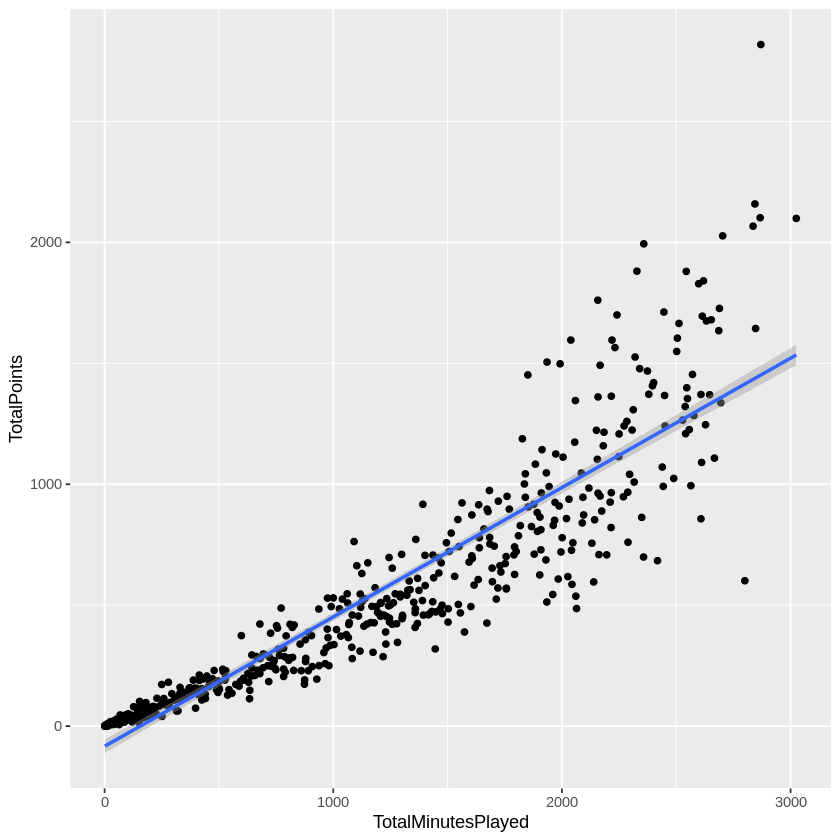

In [57]:
NBA1819<- fetch_NBAPlayerStatistics("18-19")

ggplot(NBA1819,aes(x=TotalMinutesPlayed,y=TotalPoints))+ geom_point()+ geom_smooth(method = "glm")


lm(TotalPoints~TotalMinutesPlayed,data =NBA1819)

In [58]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted, data =NBA1819)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1819)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           -14.6302              -0.0101               1.3093  

Degrees of Freedom: 529 Total (i.e. Null);  527 Residual
Null Deviance:	    1.3e+08 
Residual Deviance: 2490000 	AIC: 5990

In [59]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position, data =NBA1819)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1819)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
            37.6575              -0.0165               1.3276  
         PositionPF           PositionPG           PositionSF  
           -31.2035             -78.8570             -54.2729  
         PositionSG  
           -76.9879  

Degrees of Freedom: 528 Total (i.e. Null);  522 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    1.3e+08 
Residual Deviance: 2080000 	AIC: 5900